# White Shark Automation - V3

In this version we will be using a local GPU (RTX 8GB card). We will use the vision module under the fast.ai toolbox. This version will be a simple classification algorithm attempting to classify images with sharks and without sharks.

In [1]:
%reload_ext autoreload
%autoreload 2 
%matplotlib inline

We import all the necessary packages. We are going to work with the fastai V1 library which sits on top of Pytorch 1.0.

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
import numpy as np

Set the batch size. We will start with 16 which seems to work with this size GPU.

In [3]:
bs = 16

# Import the data

Get the file names

In [4]:
path_img = 'D:\\Population Study Videos\\Training Data\\Shark\\'
fnames = get_image_files(path_img)
fnames[:5]

[WindowsPath('D:/Population Study Videos/Training Data/Shark/file_GOPRO0571000 (2).jpeg'),
 WindowsPath('D:/Population Study Videos/Training Data/Shark/file_GOPRO0571000.jpeg'),
 WindowsPath('D:/Population Study Videos/Training Data/Shark/file_GOPRO0571001 (2).jpeg'),
 WindowsPath('D:/Population Study Videos/Training Data/Shark/file_GOPRO0571001.jpeg'),
 WindowsPath('D:/Population Study Videos/Training Data/Shark/file_GOPRO0571002 (2).jpeg')]

Create a data bunch.  This function also defines the split between training and validation images (80/20).  The images are downscaled to 224 x 224 to reduce computational demand.  Additionally data augmentation is applied to the dataset under ds_tfms variable.  The images are normalized using the imagenet statistics to maintain consistency with the pre-trained model.

In [5]:
np.random.seed(42)
path = 'D:\\Population Study Videos\\Training Data\\'
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, 
                                  ds_tfms=get_transforms(), size=224, 
                                  num_workers=4).normalize(imagenet_stats)

Let's look at the data

In [6]:
data.classes

['No shark', 'Shark']

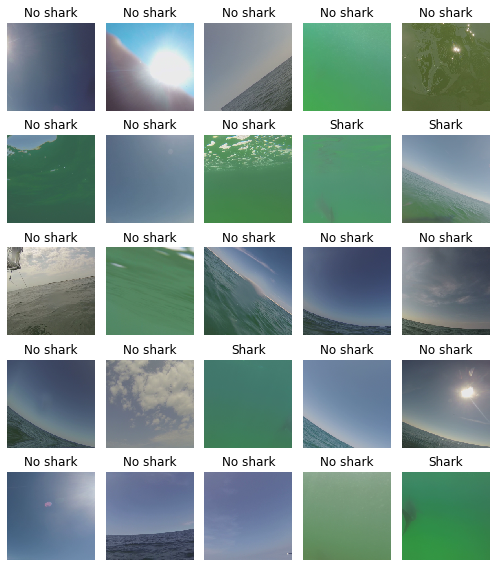

In [7]:
data.show_batch(rows = 5, figsize=(7,8))

Print the class labels, number of classes, number of images in the training set and the number of images in the validation set

In [8]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['No shark', 'Shark'], 2, 514783, 128695)

# Train the model - RESNET 50

This model is the resnet50 convolutional neural network, which is a robust, medium sized model. This model is pre-trained on the imagenet dataset. This first iteration of fitting will fine-tune the outputs from the imagenet classes to our classes.

In [9]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [10]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,0.097932,0.057697,0.020420,6:26:33
1,0.076717,0.046398,0.016007,6:08:31
2,0.072264,0.041334,0.014375,6:05:04
3,0.053967,0.035659,0.012642,6:04:55
4,0.053269,0.032953,0.011951,6:04:46
5,0.050329,0.031047,0.011314,6:04:31


In [11]:
learn.save('stage-1')

Let's unfreeze the model.  This fine-tunes the parameter throughout the model architecture. 

In [12]:
learn.unfreeze()

Run lr_find to find the optimal learning rate.

In [13]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


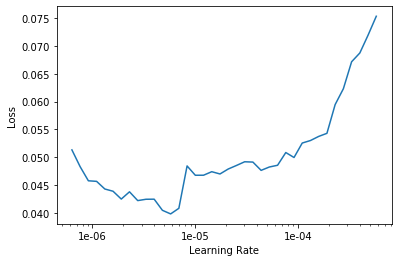

In [14]:
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(7, max_lr=slice(3e-7, 3e-6))

epoch,train_loss,valid_loss,error_rate,time
0,0.047771,0.030575,0.011174,6:09:37
1,0.044604,0.029403,0.010762,6:21:19
2,0.040594,0.027892,0.010443,6:11:02
3,0.043425,0.026644,0.009822,6:09:28
4,0.042282,0.025499,0.009495,6:10:02
5,0.040641,0.025943,0.009705,6:07:25
6,0.047167,0.025697,0.009697,6:06:11


In [16]:
learn.save('stage-2')

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

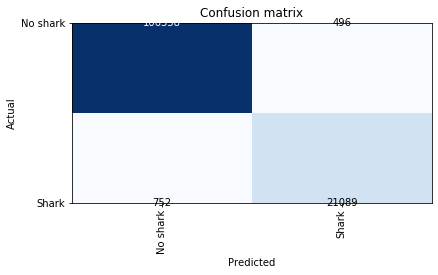

In [18]:
interp.plot_confusion_matrix()

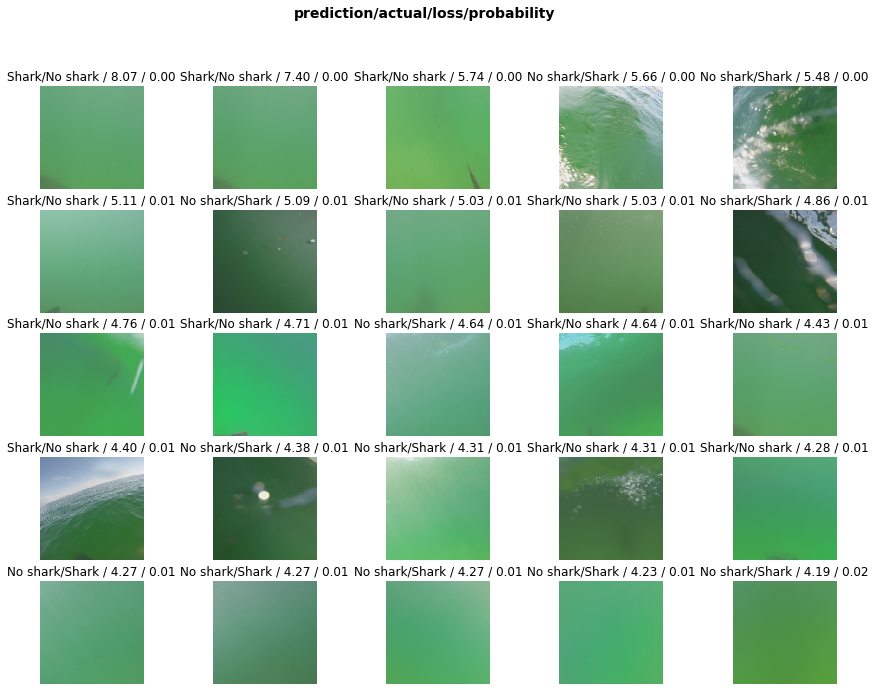

In [19]:
interp.plot_top_losses(25, figsize=(15,11))

In [20]:
learn.export('WS_RESNET_50.pkl')